<a href="https://colab.research.google.com/github/SaraHassaan/MachineLearningWithPython-Coursera/blob/main/SimpleLinearRegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

def analysis(features_df):
    # function body
    features_df.sample(10)
    ##Visualize features
    viz = features_df[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
    viz.hist()
    plt.show()
    ##display some scatter plots of these features against the CO2 emissions, to see how linear their relationships are.
    ##fuel consumption compined vs co2 emissions
    ##note: they naturally form 3 distinct groups when plotting
    ##group#1 (25%)Efficient small cars (steep slope)
    ##group2 (50%) Average midsize cars (medium slope)
    ##group3 (75%)Large powerful cars (flat slope)
    plt.scatter(features_df.FUELCONSUMPTION_COMB, features_df.CO2EMISSIONS,  color='blue')
    plt.xlabel("FUELCONSUMPTION_COMB")
    plt.ylabel("Emission")
    plt.show()
    df.describe()
    ##engine size vs co2 emissions
    plt.scatter(features_df.ENGINESIZE, features_df.CO2EMISSIONS,  color='blue')
    plt.xlabel("Engine size")
    plt.ylabel("Emission")
    plt.xlim(0,27)
    plt.show()
    df.describe()
    ##clyinder vs co2 emissions
    plt.scatter(features_df.CYLINDERS, features_df.CO2EMISSIONS,  color='blue')
    plt.xlabel("CYLINDERS")
    plt.ylabel("Emission")
    plt.xlim(0,27)
    plt.show()
    df.describe()


In [38]:
## Visualize model outputs
#import matplotlib.pyplot as plt
def visualize_trained_model(X_train, y_train, model):
  ##scatter is used to draw dots in the diagram
  plt.scatter(X_train, y_train,  color='blue')
  ##plot is used to draw our model equation
  plt.plot(X_train, model.coef_[0] * X_train + model.intercept_, '-r') #r color
  plt.xlabel("Engine size")
  plt.ylabel("Emission")

In [34]:
import matplotlib.pyplot as plt
from sklearn import linear_model
#x:independent variable (feature)
#y:actual dependent variable (o/p)
def train_regression_model(X_train, X_test, y_train, y_test):
  #type(X_train), np.shape(X_train)
  ## create a model object
  model = linear_model.LinearRegression()
  ##use reshape to transform the 1-d array to 2d because fit needs to 2d array
  ##[1,2,3] => [[1],[2],[3]] each sample has one feature
  ##train your model using fit
  model.fit(X_train.reshape(-1, 1), y_train)
  return model


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_model(X_test,y_test,model):
  #predict is used to predict the output
  y_pred = model.predict(X_test.reshape(-1,1))
  mean_abs_err = mean_absolute_error(y_test, y_pred)
  mean_square_err = mean_squared_error(y_test, y_pred)
  r2score = r2_score(y_test, y_pred)
  ##evaluation
  print("Mean absolute error: %.2f" % mean_abs_err)
  print("Mean squared error: %.2f" % mean_square_err)
  print("Root mean squared error: %.2f" % np.sqrt(mean_square_err))
  print("R2-score: %.2f" % r2score)
  print(len(y_pred))


Slope:  16.180900781199195
Intercept:  69.10302617988444
Mean absolute error: 20.44
Mean squared error: 797.43
Root mean squared error: 28.24
R2-score: 0.81
214


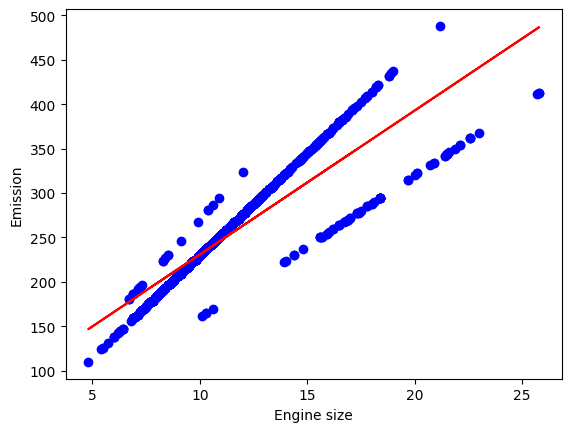

In [39]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
#%matplotlib inline
from sklearn import linear_model

#url = 'https://open.canada.ca/data/en/api/3/action/datastore_search?resource_id=d589f2bc-9a85-4f65-be2f-20f17debfcb1&limit=5&q=title:jones'
#fileobj = urllib.request.urlopen(url)
#print(fileobj.read())

##load the data
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
##data frame
df=pd.read_csv(url)

## verify successful load with some randomly selected records
df.sample(60)
df.describe()
#df[
#    (df["FUELCONSUMPTION_COMB_MPG"] >= 52) &
 #   (df["FUELCONSUMPTION_COMB_MPG"] <= 60)
#]

##Select features(most importnat features)
features_df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
#analysis(features_df)
##Extract engine size
#x = features_df.ENGINESIZE.to_numpy()
x = features_df.FUELCONSUMPTION_COMB.to_numpy()
y = features_df.CO2EMISSIONS.to_numpy()
## Split data to be 20% test and train data 80%
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = train_regression_model(X_train, X_test, y_train, y_test)
## Print the coefficients
## Slope means if we change the input/feature(x) by 1 unit(liter), the output/dependent varible(y) would be changed by solpe valye
print ('Slope: ', model.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ', model.intercept_)
visualize_trained_model(X_train, y_train, model)
evaluate_model(X_test, y_test, model)
#visualize_trained_model(X_test, y_test, model)
